In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import seaborn as sns
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV, cross_val_score

# fit and transform utility
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder

print(tf.__version__)

def plot_actual_prediction(x_train,y_train,x_test,y_test,y_pred):
  """
  plot the scatter plot for actual and predicted value
  """
  plt.figure(figsize=(12,9))
  plt.scatter(x_train,y_train,c = "blue",label="train")
  plt.scatter(x_test,y_test,c="green",label="test")
  plt.scatter(X_test,y_pred,c="red",label="prediction")
  plt.legend()

def mae(y_true,y_pred):
  """
  calculate mae
  """
  return tf.metrics.mean_absolute_error(y_true,y_pred)
  
def mse(y_true,y_pred):
  return tf.metrics.mean_squared_error(y_true,y_pred)

2.8.2


## 2022.06.12 NN Regresion part 1
- Purpose: find relationship between 1..n independent variables and 1 dependent variable
- Applied problem:
  - number
  - the coordinate of corner of rectangle that include the detected object in the image
- Notes.
  - simple linear regression model -> if change neural network model, then arch would be like O-O

### Create sample datasets
- matplotlib can integrate with tensors

In [ ]:
data = tf.constant([1,2,3])

print(data[tf.newaxis,:])
print(tf.expand_dims(data,axis=0))

tf.Tensor([[1 2 3]], shape=(1, 3), dtype=int32)
tf.Tensor([[1 2 3]], shape=(1, 3), dtype=int32)


[-7. -4. -1.  2.  5.  8. 11. 14.]
[ 3.  6.  9. 12. 15. 18. 21. 24.]


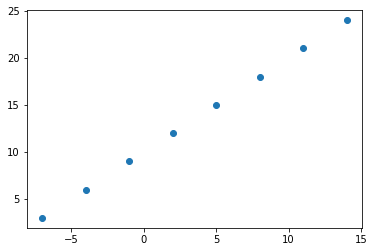

In [ ]:
X = np.arange(-7,15,3,dtype=np.float32)
y = X + 10
print(X)
print(y)
plt.scatter(X,y)

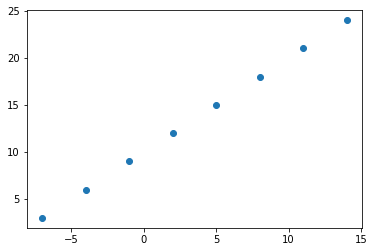

In [ ]:
X_tensor = tf.constant(X)
y_tensor = tf.constant(y)
plt.scatter(X_tensor,y_tensor)

### Modeling
- Create Model, define the model structure or pick-up model from tensorflow hub for transfer learning purpose.
  - Dense: define the hidden layer and **output layer**
- Compile Model, like define the cost function, optimizer evaluation metrics
- Fit training dataset
- Evaluating
  - how to improve the model: model parameter or hyper parameter tuning
    - add more datasets
    - add more hidden layers. neurons
    - change activation function
    - adjust optimizer, learning rate
    - extend epochs 
- Predicition

In [ ]:
X_shape = X_tensor.shape
y_shape = y_tensor.shape
X_shape[0], y_shape

(8, TensorShape([8]))

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential()

# can define hidden layers and output layers
model.add(tf.keras.layers.Dense(10,activation=None))
model.add(tf.keras.layers.Dense(10,activation=None))
model.add(tf.keras.layers.Dense(10,activation=None))
model.add(tf.keras.layers.Dense(1))

model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.002),
              metrics=["mae"])

# expand dim on the last axis of tensor
# (n) -> (n,1)
model.fit(tf.expand_dims(X_tensor,axis=-1),y_tensor,epochs=300,verbose="auto")

Epoch 1/300
1/1 [==============================] - 1s 920ms/step - loss: 16.1154 - mae: 16.1154
Epoch 2/300
1/1 [==============================] - 0s 15ms/step - loss: 15.8830 - mae: 15.8830
Epoch 3/300
1/1 [==============================] - 0s 17ms/step - loss: 15.6561 - mae: 15.6561
Epoch 4/300
1/1 [==============================] - 0s 9ms/step - loss: 15.4347 - mae: 15.4347
Epoch 5/300
1/1 [==============================] - 0s 10ms/step - loss: 15.2188 - mae: 15.2188
Epoch 6/300
1/1 [==============================] - 0s 10ms/step - loss: 15.0080 - mae: 15.0080
Epoch 7/300
1/1 [==============================] - 0s 11ms/step - loss: 14.8215 - mae: 14.8215
Epoch 8/300
1/1 [==============================] - 0s 10ms/step - loss: 14.6827 - mae: 14.6827
Epoch 9/300
1/1 [==============================] - 0s 13ms/step - loss: 14.5483 - mae: 14.5483
Epoch 10/300
1/1 [==============================] - 0s 12ms/step - loss: 14.4173 - mae: 14.4173
Epoch 11/300
1/1 [==============================]

In [ ]:
# Evaluate the model performance for tuning purpose or model comparisons.
model.evaluate([20],[30])

# predict a value
model.predict([20,30])

1/1 [==============================] - 0s 149ms/step - loss: 0.5968 - mae: 0.5968


array([[29.403202],
       [39.126114]], dtype=float32)

In [ ]:
"""
can found like the model paraemeter so the Dense that we add on in the keras model is hidden layer
"""
model.summary()

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_63 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


## 2022.06.13 NN Regression Part 2

### Evaluating the Model
- Dense: fully connected Layers
- weights/bias: trainable params

In [ ]:
tf.random.set_seed(42)
X = tf.random.shuffle(tf.range(-100,100,4,dtype=tf.float32))
n = X.shape[0]
Y = X + 10
X,Y

(<tf.Tensor: shape=(50,), dtype=float32, numpy=
 array([  48., -100.,  -24.,  -32.,   52.,   36.,  -48.,  -52.,   56.,
          16.,  -12.,  -40.,  -88.,  -56.,    4.,   92.,   -8.,  -68.,
         -92.,    8.,   64.,  -96.,   40.,  -36.,   32.,  -44.,  -28.,
          20.,    0.,  -16.,   60.,   24.,  -72.,   80.,   84.,   -4.,
         -64.,  -20.,   44.,   12.,   68.,   76.,   72.,  -60.,  -84.,
          96.,  -76.,   28.,   88.,  -80.], dtype=float32)>,
 <tf.Tensor: shape=(50,), dtype=float32, numpy=
 array([ 58., -90., -14., -22.,  62.,  46., -38., -42.,  66.,  26.,  -2.,
        -30., -78., -46.,  14., 102.,   2., -58., -82.,  18.,  74., -86.,
         50., -26.,  42., -34., -18.,  30.,  10.,  -6.,  70.,  34., -62.,
         90.,  94.,   6., -54., -10.,  54.,  22.,  78.,  86.,  82., -50.,
        -74., 106., -66.,  38.,  98., -70.], dtype=float32)>)

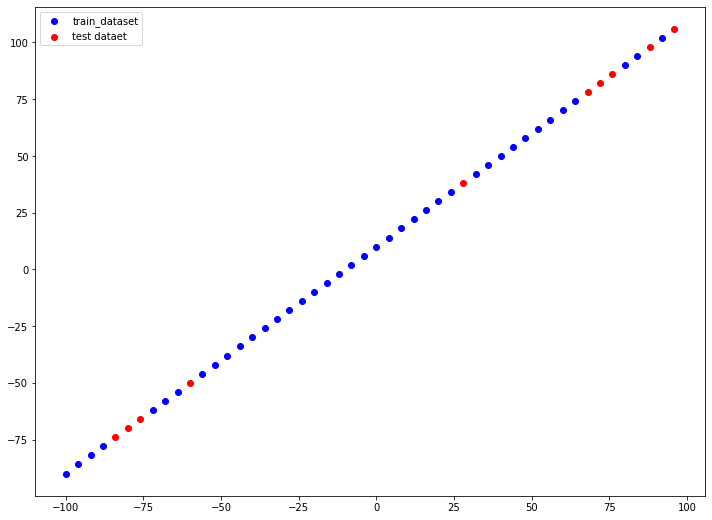

In [ ]:
# shuffle dataset and split dataset into training dataset and testing dataset, the reason why we split to validation dataset
# is because the size of dataset is too small.
X_training = X[:int(0.8*n)]
Y_training = Y[:int(0.8*n)]
X_test = X[int(0.8*n):]
Y_test = Y[int(0.8*n):]
X_training,Y_training,X_test,Y_test

plt.figure(figsize=(12,9))
plt.scatter(X_training,Y_training,color="blue",label = "train_dataset")
plt.scatter(X_test,Y_test,color="red",label = "test dataet")
plt.legend()

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential()

# input shape can also be define in the sequential model.
model.add(tf.keras.layers.Input([X_training.ndim]))
model.add(tf.keras.layers.Dense(50,activation="relu",name="1st_hidden_layer"))
model.add(tf.keras.layers.Dense(50,activation="relu",name="2nd_hidden_layer"))
model.add(tf.keras.layers.Dense(50,activation="relu",name="3rd_hidden_layer"))
model.add(tf.keras.layers.Dense(1,input_shape=[1],name="output_layer"))

model.compile(loss = tf.keras.losses.mean_absolute_error,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics = ["mse"])

model.fit(tf.expand_dims(X_training,axis=-1),Y_training,epochs=300,verbose=0)

#model.evaluate(X_test,Y_test)

KeyboardInterrupt: ignored

In [ ]:
model.summary()
model.layers, model.layers[1].bias, model.layers[1].weights
# y = ax+b => b = 0.904, a = 0.728

### Plot Model
- from tensorflow.keras.utils import plot_model
- plot_model(model,show_shapes=True)

In [ ]:
### plot model,
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True)

### Model Predict

In [ ]:
#model.evaluate(X_test,Y_test)

Y_pred = model.predict(X_test)


plt.figure(figsize=(12,9))
plt.scatter(X_training,Y_training,c="blue",label="training")
plt.scatter(X_test,Y_test,c="green",label="testing")
plt.scatter(X_test,Y_pred,c="red",label="prediction")

plt.legend()


### Evaluation Metrics
- the metrics after we run evluate method actually will present the value about the loss and evaluation metrics that define in the model compile

In [ ]:
model.evaluate(X_test,Y_test)
Y_actual = tf.reshape(Y_test,shape=(-1,1))

In [ ]:
print(tf.math.reduce_mean(tf.abs(Y_actual - Y_pred)))
print(tf.metrics.mean_absolute_error(Y_test,tf.squeeze(Y_pred)))
print(tf.metrics.mean_squared_error(Y_test,tf.squeeze(Y_pred)))
print(tf.math.reduce_mean((Y_actual - Y_pred)**2))


## 2022.06.14 - NN Regression Part 3

### Set up a model experiments
- model experiement can not only happen on the comparison of different model 
- can also be applied to the same model based on different time that you enhance
  - like pre/post on the same model
- Do 3 model experiment
  - `model_1`: 1 layer 100 epochs
  - `model_2`: 2 layers 100 epochs
  - `model_3`: 2 layers 500 epochs

In [ ]:
def plot_actual_prediction(x_train,y_train,x_test,y_test,y_pred):
  """
  plot the scatter plot for actual and predicted value
  """
  plt.figure(figsize=(12,9))
  plt.scatter(x_train,y_train,c = "blue",label="train")
  plt.scatter(x_test,y_test,c="green",label="test")
  plt.scatter(X_test,y_pred,c="red",label="prediction")
  plt.legend()

def mae(y_true,y_pred):
  """
  calculate mae
  """
  return tf.metrics.mean_absolute_error(y_true,y_pred)
  
def mse(y_true,y_pred):
  return tf.metrics.mean_squared_error(y_true,y_pred)

In [ ]:
# dataset
tf.random.set_seed(42)
X = tf.random.shuffle(tf.range(-100,100,4,dtype=tf.float32))
n = X.shape[0]
Y = X + 10
X_train = X[:int(0.8*n)]
y_train = Y[:int(0.8*n)]
X_test = X[int(0.8*n):]
y_test = Y[int(0.8*n):]
X_training,y_train,X_test,y_test

(<tf.Tensor: shape=(40,), dtype=float32, numpy=
 array([  48., -100.,  -24.,  -32.,   52.,   36.,  -48.,  -52.,   56.,
          16.,  -12.,  -40.,  -88.,  -56.,    4.,   92.,   -8.,  -68.,
         -92.,    8.,   64.,  -96.,   40.,  -36.,   32.,  -44.,  -28.,
          20.,    0.,  -16.,   60.,   24.,  -72.,   80.,   84.,   -4.,
         -64.,  -20.,   44.,   12.], dtype=float32)>,
 <tf.Tensor: shape=(40,), dtype=float32, numpy=
 array([ 58., -90., -14., -22.,  62.,  46., -38., -42.,  66.,  26.,  -2.,
        -30., -78., -46.,  14., 102.,   2., -58., -82.,  18.,  74., -86.,
         50., -26.,  42., -34., -18.,  30.,  10.,  -6.,  70.,  34., -62.,
         90.,  94.,   6., -54., -10.,  54.,  22.], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([ 68.,  76.,  72., -60., -84.,  96., -76.,  28.,  88., -80.],
       dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([ 78.,  86.,  82., -50., -74., 106., -66.,  38.,  98., -70.],
       dtype=float

#### model 1 - 1 layer, 100 epochs
- 1 layer with 100 epochs

In [ ]:
# model1
tf.random.set_seed(42)

model_1 = tf.keras.Sequential()
model_1.add(tf.keras.layers.Dense(1))

model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["mae"])

model_1.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100,verbose=0)

In [ ]:
model_1.evaluate(X_test,y_test)

1/1 [==============================] - 0s 180ms/step - loss: 8.9337 - mae: 8.9337


[8.93366527557373, 8.93366527557373]

In [ ]:
y_pred_1 = model_1.predict(X_test)
mae_1 = mae(y_test,tf.squeeze(y_pred_1))
mse_1 = mse(y_test,tf.squeeze(y_pred_1))
mae_1,mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=8.933665>,
 <tf.Tensor: shape=(), dtype=float32, numpy=121.38013>)

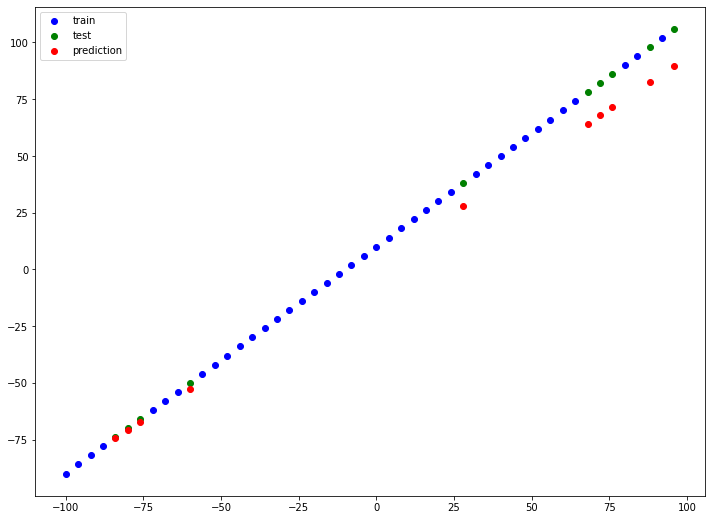

In [ ]:
plot_actual_prediction(X_train,y_train,X_test,y_test,y_pred_1)

#### model 2 - 2 layers, 100 epochs

In [ ]:
# model2
tf.random.set_seed(42)

model_2 = tf.keras.Sequential()
model_2.add(tf.keras.layers.Dense(10))
model_2.add(tf.keras.layers.Dense(1))

model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["mse"])

model_2.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100,verbose=0)

In [ ]:
model_2.evaluate(X_test,y_test)

1/1 [==============================] - 0s 100ms/step - loss: 0.3413 - mse: 0.1333


[0.3413471281528473, 0.13329151272773743]

In [ ]:
y_pred_2 = model_2.predict(X_test)
mae_2 = mae(y_test,tf.squeeze(y_pred_2))
mse_2 = mse(y_test,tf.squeeze(y_pred_2))
mae_2,mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=0.3413456>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.13329022>)

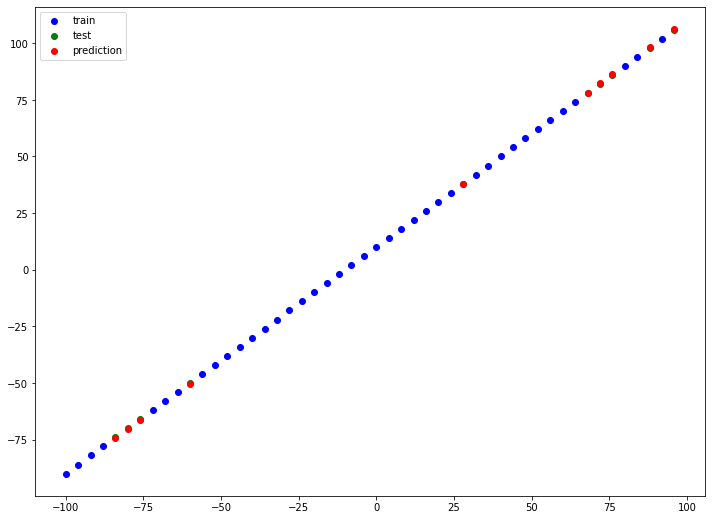

In [ ]:
plot_actual_prediction(X_train,y_train,X_test,y_test,y_pred_2)

#### Model3 - 2 layers 500 epochs

In [ ]:
# model3
tf.random.set_seed(42)

model_3 = tf.keras.Sequential()
model_3.add(tf.keras.layers.Dense(10))
model_3.add(tf.keras.layers.Dense(1))

model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["mse"])

model_3.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=500,verbose=0)

In [ ]:
model_3.evaluate(X_test,y_test)

1/1 [==============================] - 0s 338ms/step - loss: 1.3855 - mse: 2.0320


[1.3855282068252563, 2.031982183456421]

In [ ]:
y_pred_3 = model_3.predict(X_test)
mae_3 = mae(y_test,tf.squeeze(y_pred_3))
mse_3 = mse(y_test,tf.squeeze(y_pred_3))
mae_3,mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=1.3855298>,
 <tf.Tensor: shape=(), dtype=float32, numpy=2.0319858>)

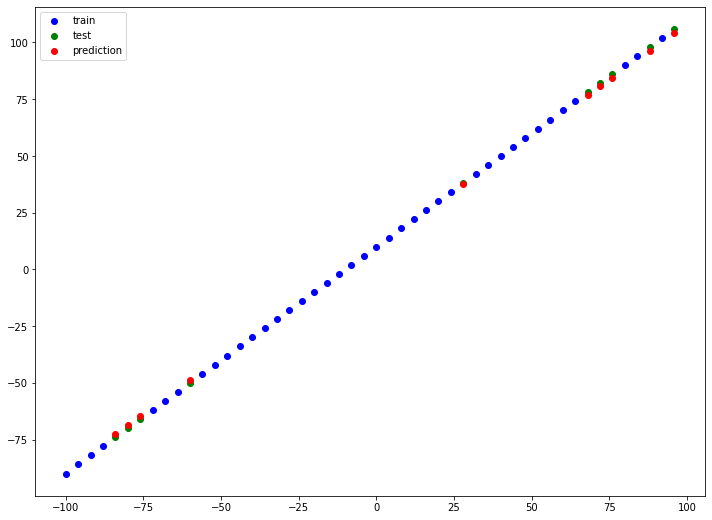

In [ ]:
plot_actual_prediction(X_train,y_train,X_test,y_test,y_pred_3)

### Model Comparison using Pandas
- but the manual create commparision table is tedious
- so recommend to use Tensorboard to track the ML/DL model experiments
  - integrate with weights & bias tracking all kinds of experiments

In [ ]:
result = {
    "model":["model_1","model_2","model_3"],
    "mae":[mae_1.numpy(),mae_2.numpy(),mae_3.numpy()],
    "mse": [mse_1.numpy(),mse_2.numpy(),mse_3.numpy()]
}

df = pd.DataFrame(result)
df.head()

## the model_2 performance is the best

,model,mae,mse
0,model_1,8.933665,121.380127
1,model_2,0.341346,0.133290
2,model_3,1.385530,2.031986


In [ ]:
model_2.summary()
model_2.layers[0].weights

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 10)                20        
                                                                 
 dense_24 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


[<tf.Variable 'dense_23/kernel:0' shape=(1, 10) dtype=float32, numpy=
 array([[ 0.2892493 , -0.06835373, -0.13093287, -0.10304241, -0.5834641 ,
          0.33166954,  0.4153012 ,  0.60229564, -0.44572604, -0.12546523]],
       dtype=float32)>,
 <tf.Variable 'dense_23/bias:0' shape=(10,) dtype=float32, numpy=
 array([ 1.5910895, -1.8131503,  1.6290575, -1.646405 ,  1.6003379,
         1.5685215,  1.5612761,  1.5600847, -1.5764729, -1.7280502],
       dtype=float32)>]

### Model Saving & Loading
- SavedModel file format or HDF5 format (.h5) -> just one file
- https://www.tensorflow.org/tutorials/keras/save_and_load#manually_save_weights -> will have a folder contains multiple assets

In [ ]:
model_2.save("best_model")
model_2.save("best_model_hdf5.h5")

INFO:tensorflow:Assets written to: best_model/assets


In [ ]:
saved_model = tf.keras.models.load_model("best_model")
hdf5_model = tf.keras.models.load_model("best_model_hdf5.h5")

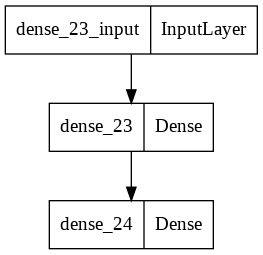

In [ ]:
plot_model(saved_model)

In [ ]:
## use the new loaded model and the original model to predict the testing dataset 
## to see if the model architecture is the same between those two models
model_2.predict(X_test) == saved_model.predict(X_test)

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
model_2.layers[0].bias

<tf.Variable 'dense_23/bias:0' shape=(10,) dtype=float32, numpy=
array([ 1.5910895, -1.8131503,  1.6290575, -1.646405 ,  1.6003379,
        1.5685215,  1.5612761,  1.5600847, -1.5764729, -1.7280502],
      dtype=float32)>

### Download/Upload a file from google colab
- can download through UI 
- can download through code
- can mount google drive and down load the file from there

In [ ]:
from google.colab import files
files.download("/content/best_model_hdf5.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!cp "/content/best_model_hdf5.h5" "/content/drive/MyDrive"

In [ ]:
!ls -ltr "/content/drive/MyDrive"

total 40
-rw------- 1 root root   180 Mar 22  2021 'Workbook | Design & Process - 副本.gslides'
drwx------ 2 root root  4096 May  3  2021  買房規劃
-rw------- 1 root root   143 Dec 28 13:52 'GCP Data Engineer Exams.gsheet'
-rw------- 1 root root   143 Dec 31 02:16  Cars.gsheet
drwx------ 2 root root  4096 Jun  9 13:36 'Tensorflow Certificate Developer'
drwx------ 2 root root  4096 Jun  9 13:36 'Colab Notebooks'
-rw------- 1 root root 26368 Jun 14 14:00  best_model_hdf5.h5


## 2022.06.15 NN Regresion Part 4


### kaggle: Medial Cost Predcition 
  - medical cost prediction: https://www.kaggle.com/datasets/mirichoi0218/insurance
  - dataset: https://raw.githubusercontent.com/SahilChachra/Medical-Cost-Prediction/master/insurance.csv
- can put the dataframe into the tensorflow model directly
  - pandas build on top of numpy so tensors will know the the numpy array behind the  pandas dataframe

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/SahilChachra/Medical-Cost-Prediction/master/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
total = pd.get_dummies(df,["sex","region","smoker"])
X = total.drop("charges",axis=1)
Y = total["charges"]

In [25]:
scaler = MinMaxScaler()
X_train,X_test,y_train,y_test = train_test_split(X,Y,random_state=42,test_size=0.2)

In [28]:
X_train[["age","bmi","children"]] = scaler.fit_transform(X_train[["age","bmi","children"]])
X_test[["age","bmi","children"]] = scaler.transform(X_test[["age","bmi","children"]])

In [55]:
model = tf.keras.models.Sequential([
   tf.keras.layers.Dense(100,activation="relu"),
   tf.keras.layers.Dense(100,activation="relu"),
   tf.keras.layers.Dense(100,activation="relu"),
   tf.keras.layers.Dense(1,activation="linear")                           
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(),
              metrics = "mse"
             )
history = model.fit(X_train,y_train,
                    epochs = 100,
                    callbacks = [tf.keras.callbacks.EarlyStopping(patience=200),
                                 tf.keras.callbacks.ReduceLROnPlateau(patience=50)],
                    validation_data = (X_test,y_test))

Epoch 1/100
34/34 [==============================] - 1s 12ms/step - loss: 13342.2500 - mse: 322346240.0000 - val_loss: 12953.1562 - val_mse: 323034048.0000 - lr: 0.0010
Epoch 2/100
34/34 [==============================] - 0s 7ms/step - loss: 13266.3584 - mse: 320348288.0000 - val_loss: 12736.8672 - val_mse: 317432544.0000 - lr: 0.0010
Epoch 3/100
34/34 [==============================] - 0s 6ms/step - loss: 12628.7480 - mse: 303718048.0000 - val_loss: 11356.4688 - val_mse: 283322400.0000 - lr: 0.0010
Epoch 4/100
34/34 [==============================] - 0s 7ms/step - loss: 10313.2188 - mse: 242220512.0000 - val_loss: 8611.3379 - val_mse: 199394800.0000 - lr: 0.0010
Epoch 5/100
34/34 [==============================] - 0s 6ms/step - loss: 8070.3384 - mse: 163943552.0000 - val_loss: 8211.5225 - val_mse: 153200624.0000 - lr: 0.0010
Epoch 6/100
34/34 [==============================] - 0s 6ms/step - loss: 7739.0469 - mse: 143422416.0000 - val_loss: 7883.2612 - val_mse: 146812496.0000 - lr: 0.0

In [47]:
## using make column transformer
X = df.drop("charges",axis=1)
Y = df["charges"]

In [48]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,random_state=42,test_size=0.2)

In [49]:
col_transformer = make_column_transformer(
    (MinMaxScaler(),["bmi","age","children"]),
    (OneHotEncoder(),["sex","region","smoker"])
)

In [52]:
X_train = col_transformer.fit_transform(X_train)
X_test = col_transformer.transform(X_test)

In [56]:
model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 2615.1318 - mse: 34890816.0000


[2615.1318359375, 34890816.0]

int age - int64


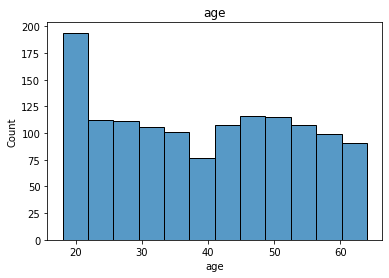

----------------------------------------------------------------------------------------------------
object sex - object


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


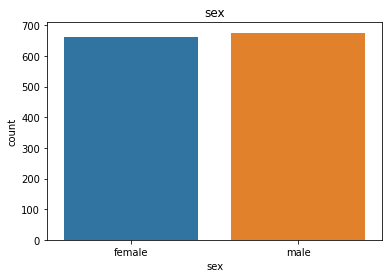

----------------------------------------------------------------------------------------------------
float64: bmi - float64


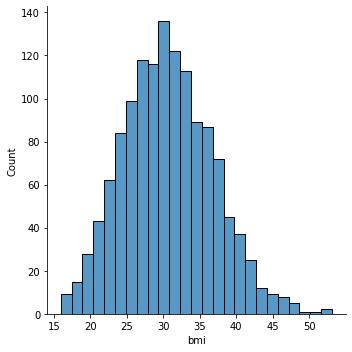

----------------------------------------------------------------------------------------------------
int children - int64


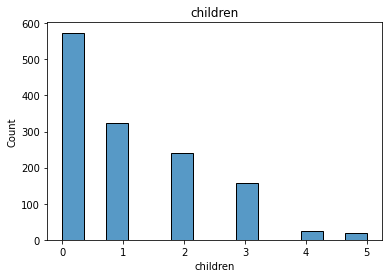

----------------------------------------------------------------------------------------------------
object smoker - object


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


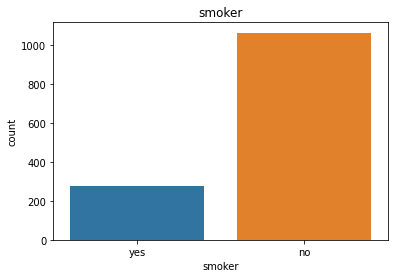

----------------------------------------------------------------------------------------------------
object region - object


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


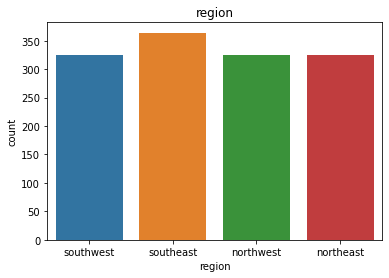

----------------------------------------------------------------------------------------------------
float64: charges - float64


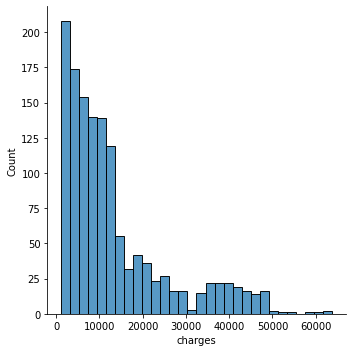

----------------------------------------------------------------------------------------------------


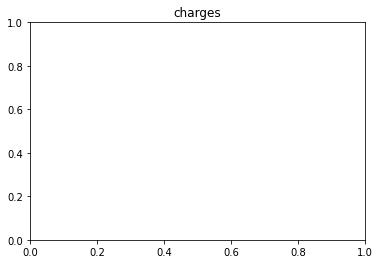

In [ ]:
# look in the the data
for col in df.columns:
  col_name = col
  type_ = df[col].dtypes
  #print(f"col_name:{col},dtype:{df[col].dtypes}")
  if type_ == np.float64:
    print(f"float64: {col_name} - {type_}")
    sns.displot(df[col_name])
    plt.show()
    plt.title(col_name)
    #plt.hist(df[col_name])
    #plt.title(col_name)
    #plt.show()
  elif type_ == object:
    print(f"object {col_name} - {type_}")
    sns.countplot(df[col_name])
    plt.title(col_name)
    plt.show()
  elif type_ == np.int64:
    print(f"int {col_name} - {type_}")
    sns.histplot(df[col_name])
    plt.title(col_name)
    plt.show()
  print("-"*100)


In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# look into the data and prepare training and testing datasets
print(df.shape[0])
print(df.columns)

# preprocessing the data do the scaling on the numerica data



# one-hot encoding for categorical data in pandas and 
df_numeric = pd.get_dummies(df,columns=["sex","smoker","region"])
y = df_numeric["charges"]
X = df_numeric.drop("charges",axis=1)


# shuffle and split the data
## using sklearn.model_selection train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# convert it to the tensor data
# no need to convert to tensor, 
"""
X_train = tf.constant(X_train.values,dtype=tf.dtypes.float32)
y_train = tf.constant(y_train.values,dtype=tf.dtypes.float32)
X_test = tf.constant(X_test.values,dtype=tf.dtypes.float32)
y_test = tf.constant(y_test.values,dtype=tf.dtypes.float32)
"""

1338
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


'\nX_train = tf.constant(X_train.values,dtype=tf.dtypes.float32)\ny_train = tf.constant(y_train.values,dtype=tf.dtypes.float32)\nX_test = tf.constant(X_test.values,dtype=tf.dtypes.float32)\ny_test = tf.constant(y_test.values,dtype=tf.dtypes.float32)\n'

In [ ]:
type(y_train),y_train.ndim

(pandas.core.series.Series, 1)

In [ ]:
### Create model:
tf.random.set_seed(42) # this will impact the randomization on the weights and bias on the neural network

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(10,input_shape=[X_train.shape[1]],activation="relu"))
model.add(tf.keras.layers.Dense(100,activation="relu"))
model.add(tf.keras.layers.Dense(10,activation="relu"))
model.add(tf.keras.layers.Dense(y_train.ndim))

model.compile(loss = tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.Adam(learning_rate=0.02),
               metrics = ["mae"])

history = model.fit(X_train,y_train,epochs=60,verbose=0)

In [ ]:
plot_model(model,show_shapes=True)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                120       
                                                                 
 dense_9 (Dense)             (None, 100)               1100      
                                                                 
 dense_10 (Dense)            (None, 10)                1010      
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2,241
Trainable params: 2,241
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.evaluate(X_test,y_test)
model.evaluate(X_train,y_train)
y_pred = model.predict(X_test)

34/34 [==============================] - 0s 2ms/step - loss: 2236.0264 - mae: 2236.0264


In [ ]:
y_test.reset_index(drop=True)

0       9095.06825
1       5272.17580
2      29330.98315
3       9301.89355
4      33750.29180
          ...     
263    47055.53210
264    12222.89830
265     6067.12675
266    63770.42801
267     9872.70100
Name: charges, Length: 268, dtype: float64

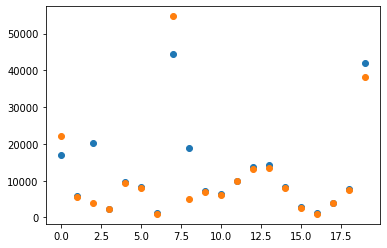

In [ ]:
# just select some data point and compare the difference
index_selected_list = np.random.choice(y_test.shape[0],size=20)
plt.scatter(np.arange(len(index_selected_list)),y_test.reset_index(drop=True)[index_selected_list],label="test")
plt.scatter(np.arange(len(index_selected_list)),y_pred[index_selected_list],label="prediction")

array([[22169.857 ],
       [ 5624.9375],
       [ 4015.6   ],
       [ 2362.4294],
       [ 9500.12  ],
       [ 7925.453 ],
       [  966.1815],
       [54704.684 ],
       [ 5080.3525],
       [ 7022.26  ],
       [ 6193.589 ],
       [ 9858.5205],
       [13152.263 ],
       [13506.335 ],
       [ 7925.453 ],
       [ 2541.3926],
       [ 1010.1256],
       [ 3907.3745],
       [ 7401.613 ],
       [38224.66  ]], dtype=float32)

In [ ]:
diff = y_test.reset_index(drop=True)[index_selected_list].values.reshape(-1,1) - y_pred[index_selected_list]
diff[np.argmax(diff)]

array([16262.20741234])

### Kaggle: Medical Cost prediction Model improvement
- add hidden layer and neurons
- history = model.fit => history will show the training history like loss and metrics in each iterative epoch
- history.history. to get the loss and metrics on each training epochs
  - 可以by 趨勢去看說最多只要train 多少epoch 即可終止training, 因為獲得的gain 不大

{'loss': [11613.4482421875,
  7618.41748046875,
  7169.9990234375,
  6904.48583984375,
  6624.734375,
  6349.13037109375,
  6165.18701171875,
  5929.5498046875,
  5449.34619140625,
  4549.56201171875,
  3771.00732421875,
  3556.1923828125,
  3572.42041015625,
  3429.44677734375,
  3171.99853515625,
  3056.97314453125,
  2925.39404296875,
  3047.046630859375,
  2968.259521484375,
  2942.58544921875,
  2870.502685546875,
  2762.2919921875,
  2784.49853515625,
  2720.035888671875,
  2740.292236328125,
  2709.620849609375,
  2780.412353515625,
  2671.016845703125,
  2715.37646484375,
  2574.879150390625,
  2689.32958984375,
  2523.937744140625,
  2576.42822265625,
  2613.1005859375,
  2456.42919921875,
  2583.435546875,
  2448.799072265625,
  2388.32080078125,
  2401.749755859375,
  2476.020263671875,
  2419.88818359375,
  2454.6787109375,
  2314.320556640625,
  2321.645751953125,
  2329.069091796875,
  2358.46826171875,
  2307.011962890625,
  2223.2490234375,
  2211.757568359375,
  2222.5

<Figure size 864x648 with 0 Axes>

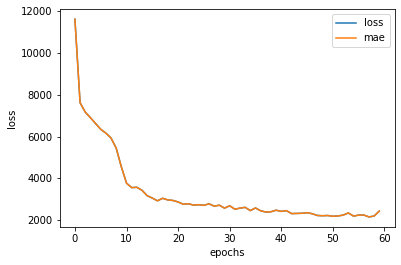

In [ ]:
plt.figure(figsize=(12,9))
pd.DataFrame(history.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss")

### Kaggle Medical Cost Prediction - Feature Engineering
- pre-processing the data
- normalization and standardization
  - from sklearn.compose import make_column_transformer
  - fit to training data set and apply to training and testing datasets
  - performance is better

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,StandardScaler, OneHotEncoder

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/SahilChachra/Medical-Cost-Prediction/master/insurance.csv")

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# sklearn compose make column transformer is like feature engineering recipe or pipeline
ct = make_column_transformer(
    (MinMaxScaler(),["age","children","bmi"]),
    (OneHotEncoder(handle_unknown="ignore"), ["sex","smoker","region"])
)

X = df.drop("charges",axis=1)
y = df["charges"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


# transformer fit training dataset only and apply to training and testing datasets
ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
# pre data
print(X_train.loc[5])

# post data
print(X_train_normal[5])

age                31
sex            female
bmi             25.74
children            0
smoker             no
region      southeast
Name: 5, dtype: object
[0.97826087 0.         0.68630616 0.         1.         1.
 0.         0.         0.         1.         0.        ]


In [ ]:
tf.random.set_seed(42)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(10,input_shape=[X_train_normal.shape[1]],activation="relu"))
model.add(tf.keras.layers.Dense(100,activation="relu"))
model.add(tf.keras.layers.Dense(10,activation="relu"))
model.add(tf.keras.layers.Dense(y_train.ndim))

model.compile(loss = tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.Adam(learning_rate=0.02),
               metrics = ["mae"])

history = model.fit(X_train_normal,y_train,epochs=60,verbose=0)

In [ ]:
model.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 1895.8458 - mae: 1895.8458


[1895.8458251953125, 1895.8458251953125]

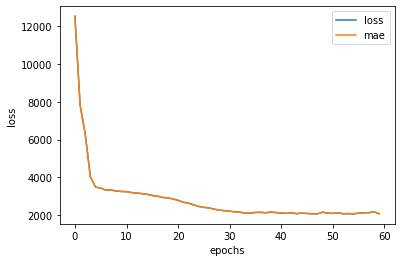

In [ ]:
result = pd.DataFrame(history.history)
result.plot()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

{'loss': [12540.1767578125,
  7848.3095703125,
  6293.4326171875,
  4026.505615234375,
  3483.978515625,
  3435.766357421875,
  3329.19287109375,
  3329.9462890625,
  3282.839599609375,
  3253.378173828125,
  3243.7119140625,
  3196.906982421875,
  3168.389892578125,
  3140.520751953125,
  3105.529296875,
  3042.940185546875,
  3004.75439453125,
  2936.021484375,
  2916.326416015625,
  2860.333984375,
  2781.138916015625,
  2684.68310546875,
  2637.568115234375,
  2541.051513671875,
  2460.4814453125,
  2411.408203125,
  2384.239501953125,
  2315.129638671875,
  2264.006103515625,
  2236.7412109375,
  2206.931640625,
  2175.273193359375,
  2154.91943359375,
  2106.015380859375,
  2106.2744140625,
  2144.742919921875,
  2148.63671875,
  2124.6337890625,
  2163.880615234375,
  2134.468017578125,
  2115.02001953125,
  2094.55517578125,
  2121.107421875,
  2077.886474609375,
  2107.947021484375,
  2087.74755859375,
  2071.754150390625,
  2066.84521484375,
  2156.375732421875,
  2110.844970

### Exercises

In [ ]:
dataset = tf.keras.datasets.boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


In [ ]:
X_train = dataset[0][0]
y_train = dataset[0][1]
X_test = dataset[1][0]
y_test = dataset[1][1]

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(10,input_shape=[X_train.shape[1]],activation="relu"))
model.add(tf.keras.layers.Dense(20,activation="relu"))
model.add(tf.keras.layers.Dense(50,activation="relu"))
model.add(tf.keras.layers.Dense(20,activation="relu"))
model.add(tf.keras.layers.Dense(10,activation="relu"))
model.add(tf.keras.layers.Dense(1,activation=None))

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.02),
              metrics = ["mae"])

history = model.fit(X_train,y_train,epochs=200,verbose=0)

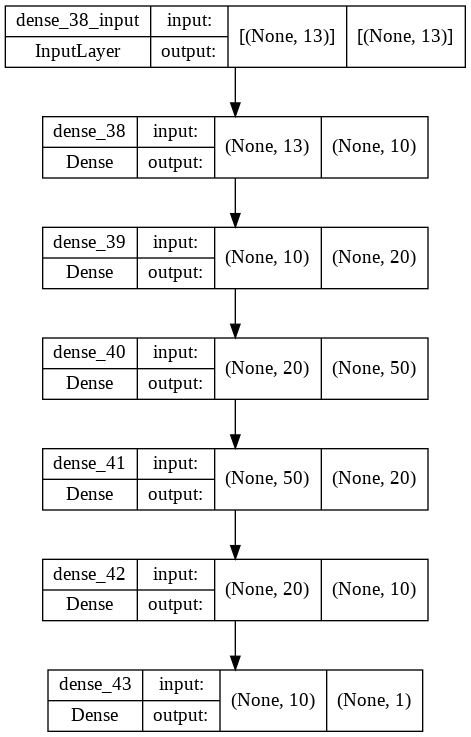

In [ ]:
plot_model(model,show_shapes=True)

In [ ]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 10)                140       
                                                                 
 dense_39 (Dense)            (None, 20)                220       
                                                                 
 dense_40 (Dense)            (None, 50)                1050      
                                                                 
 dense_41 (Dense)            (None, 20)                1020      
                                                                 
 dense_42 (Dense)            (None, 10)                210       
                                                                 
 dense_43 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2,651
Trainable params: 2,651
Non-train

In [ ]:
model.evaluate(X_test,y_test)

4/4 [==============================] - 0s 5ms/step - loss: 3.8200 - mae: 3.8200


[3.820021390914917, 3.820021390914917]

In [ ]:
tf.math.reduce_mean(tf.abs(model.predict(X_test) - y_test.reshape(-1,1))).numpy()

3.820021275913014

In [ ]:
mo